#  Programming for Data Analysis 
## Diarmuid Whelan Assignment 26-11-2018
This Jupyter notebook will examine Padraig Harrington's finishing position in professional golf tournaments using the python numpy.random package. The goal of this notebook is to
    - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data
    points across at least four different variables.
    - Investigate the types of variables involved, their likely distributions, and their relationships with each
    other.
    - Synthesise/simulate a data set as closely matching their properties as possible.
    - Detail your research and implement the simulation in a Jupyter notebook 
    – the data set itself can simply be displayed in an output cell within the notebook.
 
Padraig Harrington is one of Ireland's most successful professional athletes, winning 31 professional titles including 3 major championships and rising as far as world number 3 in World Golf Rankings. Harrington has represented Ireland at the Olympics and played on several Ryder Cup teams. Much analysis has been done in modelling professional golfer's scoring and finishing positions. The finishing position of a player can be influenced by a number of factors - adjusted score in rounds 1,2,3 and 4 - to name a few. In an attempt to simulate these influencing factors I will base this analysis on a dataset of Padraig Harrington's professional results over the last 22 years,covering 619 tournaments. The data is scraped from tour-tips.com using the golf_scraper.py file in this repository. Adjusted round scores modifies a players score using the average field score on that day.Adjusted scores for each round are a better measure of how a player has performed than raw scores because they are relative to the rest of the field and thus take into account conditions like weather and difficulty of course.

## The Dataset

In [46]:
#Load dataset and packages
import pandas
import numpy
import matplotlib.pyplot as pl
#Open the padraig_harrington.CSV FILE 
#scraped from tour-tips.com
golf=pandas.read_csv('/Users/diarmuid/Padraig_Harrington.csv',delimiter=',')
print(golf)
#Print the shape of the data
print(golf.shape)
#remove columns not required
golf.drop(golf.columns[[0,1, 2, 3,4,5,7,8,9,10,11,12,13,18,19]], axis=1, inplace=True)
golf.head


     Unnamed: 0         date                                 event  \
0             0  18-Nov-2018                           RSM Classic   
1             1  11-Nov-2018                Nedbank Golf Challenge   
2             2  04-Nov-2018                 Turkish Airlines Open   
3             3  21-Oct-2018                     Andalucia Masters   
4             4  14-Oct-2018                       British Masters   
5             5  07-Oct-2018     Alfred Dunhill Links Championship   
6             6  23-Sep-2018                      Portugal Masters   
7             7  16-Sep-2018                              KLM Open   
8             8  26-Aug-2018                         Czech Masters   
9             9  19-Aug-2018                  Wyndham Championship   
10           10  12-Aug-2018                      PGA Championship   
11           11  05-Aug-2018                Barracuda Championship   
12           12  22-Jul-2018                          British Open   
13           13  15-

<bound method NDFrame.head of     fin_pos  adj_r1_score  adj_r2_score  adj_r3_score  adj_r4_score
0        mc          73.2          67.5           NaN           NaN
1        35          70.0          71.3          71.6          67.8
2        35          65.4          71.3          72.2          72.8
3        66          70.9          72.7          72.9           NaN
4        22          70.8          70.3          68.9          67.4
5         7          65.6          72.4          69.5          67.1
6        mc          74.1          70.4           NaN           NaN
7         5          68.5          69.3          65.0          68.9
8         2          67.6          68.4          65.1          69.2
9        mc          70.6          73.7           NaN           NaN
10       mc          69.2          69.9           NaN           NaN
11       50          70.5          72.3          68.1          70.9
12       mc          72.4          70.8           NaN           NaN
13       mc       

## Variables
#### Round X Adjusted Score
Intuitively a player's adjusted round score will have a massive impact on the player's finishing position. Lower adjusted round scores will leave a player higher up the leaderboard and reduce the likelihood of missing a cut.

##### Round 1 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 1 Adjusted Score ranges from 61.2 to 79.9 with a mean of 70.2 and standard deviation of 2.79 and is distributed as follows:

In [47]:
golf['adj_r1_score'].describe()


count    601.000000
mean      70.112646
std        2.788537
min       61.200000
25%       68.300000
50%       70.200000
75%       71.800000
max       79.900000
Name: adj_r1_score, dtype: float64

##### Round 2 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 2 Adjusted Score ranges from 61.8 to 81.9 with a mean of 70.26 and standard deviation of 2.81 and is distributed as follows:

In [48]:
golf['adj_r2_score'].describe()

count    601.000000
mean      70.261398
std        2.809610
min       61.800000
25%       68.400000
50%       70.200000
75%       72.200000
max       81.900000
Name: adj_r2_score, dtype: float64

##### Round 3 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 3 Adjusted Score ranges from 63.2 to 78.9 with a mean of 70.63 and standard deviation of 2.86 and is distributed as follows:

In [17]:
golf['adj_r3_score'].describe()


count    459.000000
mean      70.627887
std        2.855472
min       63.200000
25%       68.800000
50%       70.500000
75%       72.600000
max       78.900000
Name: adj_r3_score, dtype: float64

#### Round 4 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 2 Adjusted Score ranges from 62.5 to 80.5 with a mean of 70.68 and standard deviation of 2.85 and is distributed as follows:

In [18]:
golf['adj_r4_score'].describe()

count    434.000000
mean      70.683641
std        2.847881
min       62.500000
25%       68.800000
50%       70.800000
75%       72.475000
max       80.500000
Name: adj_r4_score, dtype: float64

### Relationships and Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116a512b0>,
      dtype=object)

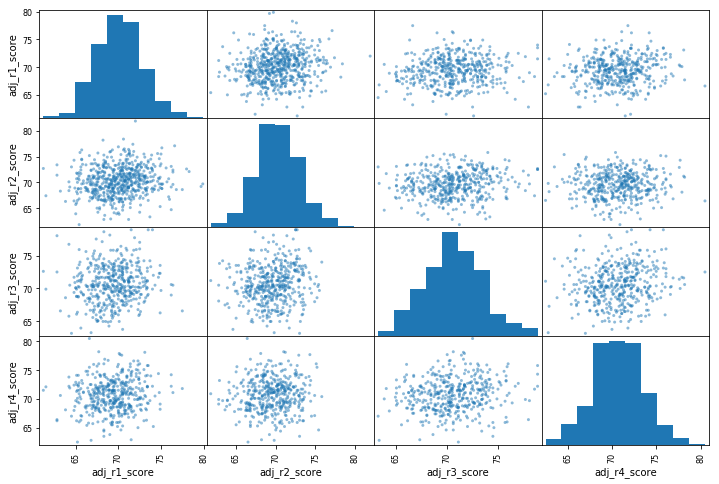

In [29]:
#PLOT THE DISTRIBUTION OF EACH VARIABLE AND THE RELATIONHSIPS BETWEEN THEM

from pandas.plotting import scatter_matrix
attributes = ["fin_pos", "adj_r1_score", "adj_r2_score", "adj_r3_score","adj_r4_score"]
scatter_matrix(golf[attributes], figsize=(12, 8))

#corr_matrix = golf.corr()
#corr_matrix[golf["fin_pos"]].sort_values(ascending=False)

The four variables look top be normally distributed around their means. Examinning the correlations between each variable more closely we see fairly random relationships. Commentators and analysts often use a player's previous day score as a predictor for future scores but this looks to be disproved here. By the looks of the scatter plots their is no striking relationship and whatever persistence effect that exists is small. in each of the below plots we observe a slight positive correlation.

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)
LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)


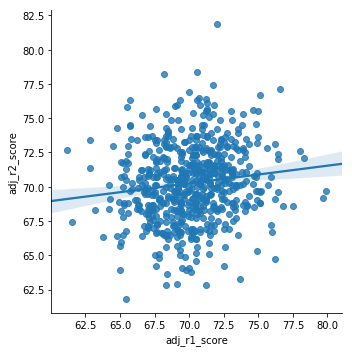

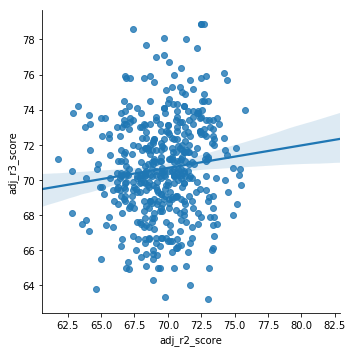

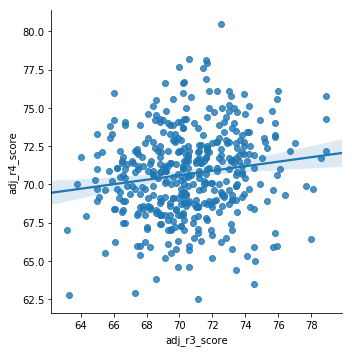

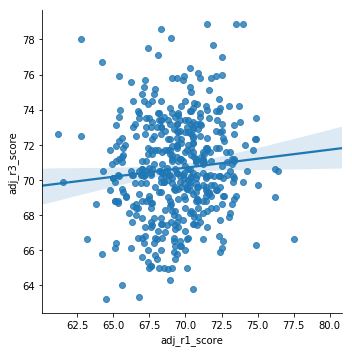

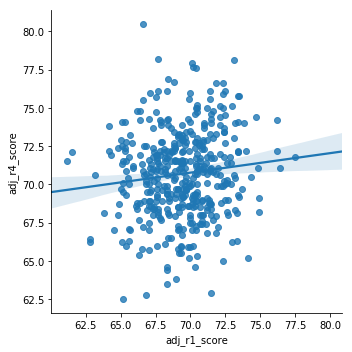

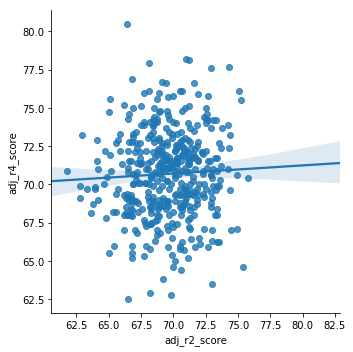

In [49]:

import seaborn as sns
sns.lmplot(x="adj_r1_score", y="adj_r2_score", data=golf)
sns.lmplot(x="adj_r2_score", y="adj_r3_score", data=golf)
sns.lmplot(x="adj_r3_score", y="adj_r4_score", data=golf)
sns.lmplot(x="adj_r1_score", y="adj_r3_score", data=golf)
sns.lmplot(x="adj_r1_score", y="adj_r4_score", data=golf)
sns.lmplot(x="adj_r2_score", y="adj_r4_score", data=golf)

from scipy import stats  
a=stats.linregress(x=golf['adj_r1_score'], y=golf['adj_r2_score'])
b=stats.linregress(x=golf['adj_r2_score'], y=golf['adj_r3_score'])
c=stats.linregress(x=golf['adj_r3_score'], y=golf['adj_r4_score'])
d=stats.linregress(x=golf['adj_r1_score'], y=golf['adj_r4_score'])
e=stats.linregress(x=golf['adj_r1_score'], y=golf['adj_r3_score'])
f=stats.linregress(x=golf['adj_r2_score'], y=golf['adj_r4_score'])
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)


In [79]:
data =golf[golf['fin_pos'] !='mc']
data =golf[numpy.isfinite(golf['adj_r3_score'])]
data =golf[numpy.isfinite(golf['adj_r4_score'])]
#print(data)


X = data[['adj_r1_score', 'adj_r2_score', 'adj_r3_score', 'adj_r4_score']]
Y = data['fin_pos']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = numpy.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = numpy.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = numpy.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

feature_labels = numpy.array(['adj_r1_score', 'adj_r2_score', 'adj_r3_score', 'adj_r4_score'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Linear Regression R squared": 0.4937
Linear Regression RMSE: 15.5155
Linear Regression MAE: 12.1287
Random Forest R squared": 0.3541
Random Forest RMSE: 17.5259
Gradient Boosting R squared": 0.4284
Gradient Boosting RMSE: 16.4860
adj_r3_score-23.15%
adj_r4_score-24.57%
adj_r1_score-25.51%
adj_r2_score-26.76%


## Simulating the Dataset

In [38]:
rd_1 = numpy.random.normal(loc=numpy.mean(golf['adj_r1_score']), scale=numpy.std(golf['adj_r1_score']), size=100000)
rd_2 = numpy.random.normal(loc=numpy.mean(golf['adj_r2_score']), scale=numpy.std(golf['adj_r2_score']), size=100000)
rd_3 = numpy.random.normal(loc=numpy.mean(golf['adj_r3_score']), scale=numpy.std(golf['adj_r3_score']), size=100000)
rd_4 = numpy.random.normal(loc=numpy.mean(golf['adj_r4_score']), scale=numpy.std(golf['adj_r4_score']), size=100000)